In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
from scipy import stats
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import rc, font_manager
from matplotlib.ticker import MaxNLocator

import scipy
from sklearn import datasets

## For Spearman correlation p-value (+adjusted p-value)
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

In [2]:
cd C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr

C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr


In [12]:
df1 = pd.read_csv('indian-corr-input.csv')
df1.set_index('#OTU ID', inplace=True)
df1.head(1)

,Age,SBP,DBP,FBS,HbA1C,Cholesterol,Triglyceride,Serum Creatinine,Insulin,Height,...,d_Bacteria;p_Firmicutes;c_Bacilli;o_Erysipelotrichales;f_Erysipelatoclostridiaceae;g_UCG-004,d_Bacteria;p_Proteobacteria;c_Gammaproteobacteria;o_Burkholderiales;f_Oxalobacteraceae;g_Herbaspirillum,d_Bacteria;p_Proteobacteria;c_Alphaproteobacteria;o_Rickettsiales;f_Mitochondria;g_Mitochondria,d_Bacteria;p_Actinobacteriota;c_Actinobacteria;o_Micrococcales;f_Micrococcaceae;g_Kocuria,d_Bacteria;p_Firmicutes;c_Bacilli;o_Staphylococcales;f_Gemellaceae;g_Gemella,d_Bacteria;p_Bacteroidota;c_Bacteroidia;o_Bacteroidales;f_Barnesiellaceae;g_Coprobacter,d_Bacteria;p_Bdellovibrionota;c_Bdellovibrionia;o_Bdellovibrionales;f_Bdellovibrionaceae;g_Bdellovibrio,d_Bacteria;p_Firmicutes;c_Clostridia;o_Oscillospirales;_;_,d_Bacteria;p_Proteobacteria;c_Gammaproteobacteria;o_Burkholderiales;f_Comamonadaceae;g_Acidovorax,d_Bacteria;p_Patescibacteria;c_Saccharimonadia;o_Saccharimonadales;f_Saccharimonadaceae;g_TM7x
#OTU ID,,,,,,,,,,,,,,,,,,,,,
M_199,50,134,82,91,5.0,112.7,22.96,1.0,1.92,157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
spearman_df = df1.corr(method = 'spearman')
spearman_df.to_csv('indian-corr-result.txt', sep= '\t')

In [14]:
def calculate_p_values(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    if np.sum(mask) < 3:  # Minimum number of non-NaN values required for Spearman correlation
        return np.nan
    else:
        return spearmanr(x[mask], y[mask])[1]

p_values = df1.apply(lambda x: df1.apply(lambda y: calculate_p_values(x, y)))
flat_p_values = np.array(p_values.values.flatten())
adjusted_p_values = multipletests(flat_p_values, method='fdr_bh')[1]
adjusted_p_values = pd.DataFrame(adjusted_p_values.reshape(p_values.shape), index=df1.columns, columns=df1.columns)
adjusted_p_values.head(3)

,Age,SBP,DBP,FBS,HbA1C,Cholesterol,Triglyceride,Serum Creatinine,Insulin,Height,...,d_Bacteria;p_Firmicutes;c_Bacilli;o_Erysipelotrichales;f_Erysipelatoclostridiaceae;g_UCG-004,d_Bacteria;p_Proteobacteria;c_Gammaproteobacteria;o_Burkholderiales;f_Oxalobacteraceae;g_Herbaspirillum,d_Bacteria;p_Proteobacteria;c_Alphaproteobacteria;o_Rickettsiales;f_Mitochondria;g_Mitochondria,d_Bacteria;p_Actinobacteriota;c_Actinobacteria;o_Micrococcales;f_Micrococcaceae;g_Kocuria,d_Bacteria;p_Firmicutes;c_Bacilli;o_Staphylococcales;f_Gemellaceae;g_Gemella,d_Bacteria;p_Bacteroidota;c_Bacteroidia;o_Bacteroidales;f_Barnesiellaceae;g_Coprobacter,d_Bacteria;p_Bdellovibrionota;c_Bdellovibrionia;o_Bdellovibrionales;f_Bdellovibrionaceae;g_Bdellovibrio,d_Bacteria;p_Firmicutes;c_Clostridia;o_Oscillospirales;_;_,d_Bacteria;p_Proteobacteria;c_Gammaproteobacteria;o_Burkholderiales;f_Comamonadaceae;g_Acidovorax,d_Bacteria;p_Patescibacteria;c_Saccharimonadia;o_Saccharimonadales;f_Saccharimonadaceae;g_TM7x
Age,0.000000,2.496873e-01,9.420975e-01,0.368738,0.095703,0.262426,0.942098,0.733805,0.942098,0.942098,...,0.942098,0.942098,0.915381,0.942098,0.942098,0.547926,0.942098,0.586585,0.942098,0.942098
SBP,0.249687,0.000000e+00,9.334452e-08,0.061433,0.038869,0.294570,0.467975,0.942098,0.942098,0.820732,...,0.942098,0.942098,0.942098,0.942098,0.870907,0.552742,0.787956,0.908207,0.799495,0.990247
DBP,0.942098,9.334452e-08,0.000000e+00,0.698280,0.286188,0.918535,0.920837,0.942098,0.942098,0.472998,...,0.942098,0.942098,0.942098,0.942098,0.942098,0.787956,0.775342,0.942098,0.942098,0.942098


In [15]:
adjusted_p_values.to_csv('indian-corr-result-adjusted-p-value.txt', sep= '\t')

In [17]:
p_values.to_csv('indian-corr-result-p-value.txt', sep= '\t')

In [18]:
df1 = pd.read_csv('indian-corr-input-top25.csv')
df1.set_index('#OTU ID', inplace=True)
df1.head(1)

,Age,SBP,DBP,FBS,HbA1C,Cholesterol,Triglyceride,Serum Creatinine,Insulin,Height,...,d_Bacteria;p_Firmicutes;c_Clostridia;o_Oscillospirales;f_[Eubacterium]_coprostanoligenes_group;g_[Eubacterium]_coprostanoligenes_group,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_Coprococcus,d_Bacteria;p_Actinobacteriota;c_Coriobacteriia;o_Coriobacteriales;f_Atopobiaceae;g_Olsenella,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_Roseburia,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_[Ruminococcus]_torques_group,d_Bacteria;p_Firmicutes;c_Bacilli;o_RF39;f_RF39;g_RF39,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_[Ruminococcus]_gauvreauii_group,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_Fusicatenibacter,d_Bacteria;p_Firmicutes;c_Clostridia;o_Clostridiales;f_Clostridiaceae;g_Clostridium_sensu_stricto_1,d_Bacteria;p_Firmicutes;c_Negativicutes;o_Veillonellales-Selenomonadales;f_Veillonellaceae;g_Megasphaera
#OTU ID,,,,,,,,,,,,,,,,,,,,,
M_199,50,134,82,91,5.0,112.7,22.96,1.0,1.92,157,...,0.002883,0.01421,0.00233,0.006115,0.008882,0.001136,0.0,0.0,0.0,0.0


In [19]:
def calculate_p_values(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    if np.sum(mask) < 3:  # Minimum number of non-NaN values required for Spearman correlation
        return np.nan
    else:
        return spearmanr(x[mask], y[mask])[1]

p_values = df1.apply(lambda x: df1.apply(lambda y: calculate_p_values(x, y)))
flat_p_values = np.array(p_values.values.flatten())
adjusted_p_values = multipletests(flat_p_values, method='fdr_bh')[1]
adjusted_p_values = pd.DataFrame(adjusted_p_values.reshape(p_values.shape), index=df1.columns, columns=df1.columns)
adjusted_p_values.head(3)

,Age,SBP,DBP,FBS,HbA1C,Cholesterol,Triglyceride,Serum Creatinine,Insulin,Height,...,d_Bacteria;p_Firmicutes;c_Clostridia;o_Oscillospirales;f_[Eubacterium]_coprostanoligenes_group;g_[Eubacterium]_coprostanoligenes_group,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_Coprococcus,d_Bacteria;p_Actinobacteriota;c_Coriobacteriia;o_Coriobacteriales;f_Atopobiaceae;g_Olsenella,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_Roseburia,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_[Ruminococcus]_torques_group,d_Bacteria;p_Firmicutes;c_Bacilli;o_RF39;f_RF39;g_RF39,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_[Ruminococcus]_gauvreauii_group,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_Fusicatenibacter,d_Bacteria;p_Firmicutes;c_Clostridia;o_Clostridiales;f_Clostridiaceae;g_Clostridium_sensu_stricto_1,d_Bacteria;p_Firmicutes;c_Negativicutes;o_Veillonellales-Selenomonadales;f_Veillonellaceae;g_Megasphaera
Age,0.000000,1.084563e-01,7.276190e-01,0.166003,0.038523,0.115130,0.590833,0.417791,0.805725,0.694197,...,0.866283,0.285628,0.552910,0.373597,0.545966,0.753035,0.231849,0.246953,0.637101,0.704195
SBP,0.108456,0.000000e+00,3.421854e-08,0.024149,0.014799,0.130819,0.231614,0.633817,0.673825,0.483679,...,0.716603,0.676564,0.503648,0.571587,0.930921,0.974215,0.789715,0.848208,0.985946,0.567594
DBP,0.727619,3.421854e-08,0.000000e+00,0.388471,0.126211,0.552910,0.552910,0.811711,0.829864,0.232960,...,0.676564,0.104613,0.716603,0.673825,0.524200,0.240996,0.870528,0.974215,0.925156,0.716603


In [20]:
adjusted_p_values.to_csv('indian-corr-result-top25-adjusted-p-value.txt', sep= '\t')

In [22]:
p_values.to_csv('indian-corr-result-top25-p-value.txt', sep= '\t')

In [21]:
spearman_df = df1.corr(method = 'spearman')
spearman_df.to_csv('indian-corr-top25-result.txt', sep= '\t')

## Visualization

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
cd C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr

C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr


In [14]:
L2 = pd.read_csv('corr-results-vis.csv')
L2.set_index('ID', inplace=True)
L2.head(1)

,Serum Creatinine,QUICKI,Waist/Hip Ratio,SBP,DBP,Insulin,HOMA-IR,FBS,HbA1C,Age,Cholesterol,Triglyceride,Weight,Waist,Hip,BMI
ID,,,,,,,,,,,,,,,,
Clostridium_sensu_stricto_1,0.031895,0.270438,0.062224,-0.003854,0.024434,-0.21605,-0.270438,-0.202845,-0.241818,-0.09304,-0.020089,-0.066464,-0.083508,-0.098723,-0.235356,-0.205752


C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:1220: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


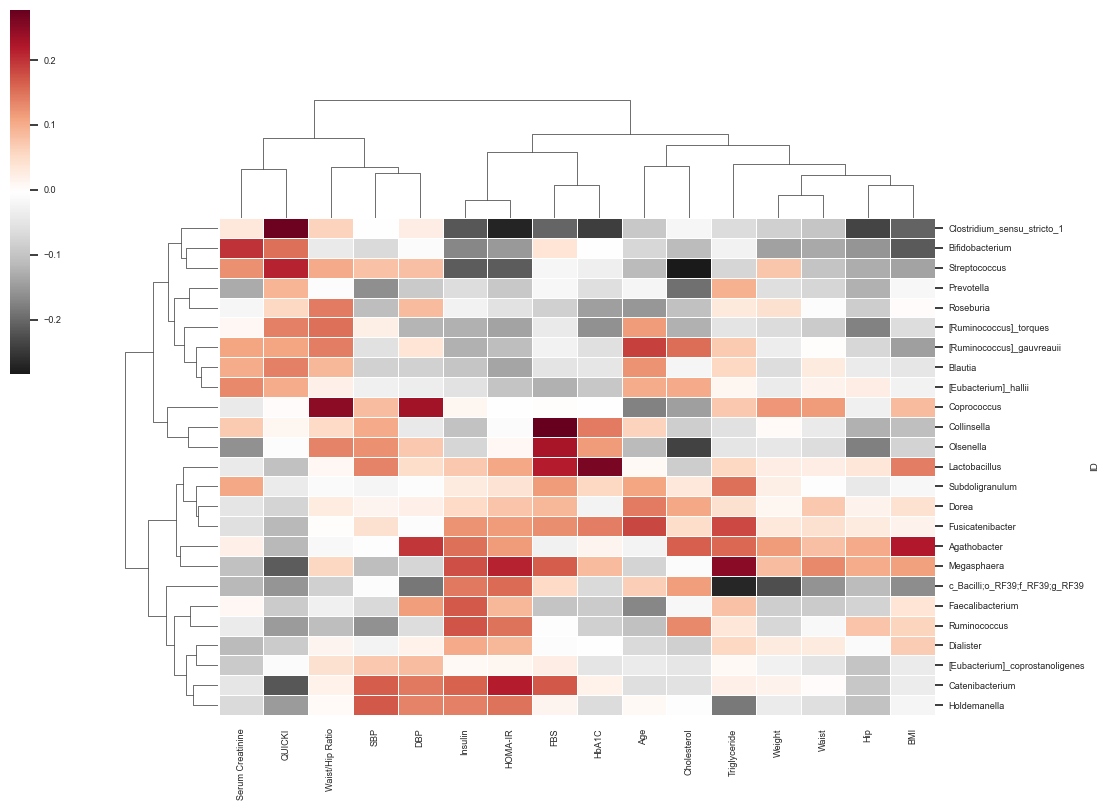

In [9]:
sns.set(font_scale=0.6)


g=sns.clustermap(L2, square=True, figsize=(10, 7.28), cmap='RdGy_r', metric="euclidean", method="complete",
               dendrogram_ratio=(.12, .2), cbar_pos=(-0.1, .6, .02, .5), col_cluster=True, row_cluster=True, 
               linewidths=0.5)

plt.savefig("pathway score-dendragram-all.svg", bbox_inches='tight')

In [21]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


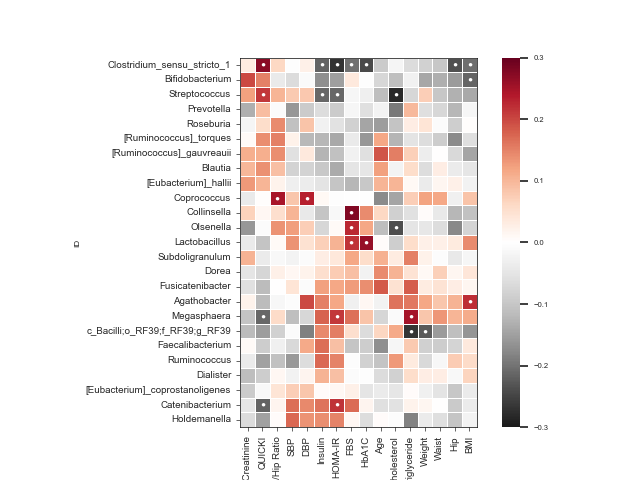

In [22]:
sns.set(font_scale=0.5)

annot = [[('' if abs(val) < 0.202840 else '●')  # add one star if abs(val) >= extreme_1
          for val in row] for row in L2.to_numpy()]

ax=sns.heatmap(L2, linewidths=0.5, annot=annot, vmin=-0.3, vmax=0.3, fmt='', cmap="RdGy_r",square=True)
for spine in ax.spines.values():
    spine.set(visible=True, lw=.5, edgecolor="black")
ax.tick_params(left=True, bottom=True, width=0.5, length=3)

ax=plt.xticks(size=7)
ax=plt.yticks(size=7)

In [23]:
plt.savefig("corr-results-vis-heatmap.svg", bbox_inches='tight')

In [26]:
df1 = pd.read_csv('metformin-diversity-corr-input.csv')
df1.set_index('#OTU ID', inplace=True)
df1.head(1)

,chao1,shannon_entropy,Age,SBP,DBP,FBS,HbA1C,Cholesterol,Triglyceride,Serum Creatinine,...,d_Bacteria;p_Firmicutes;c_Negativicutes;o_Veillonellales-Selenomonadales;f_Veillonellaceae;g_Allisonella,d_Bacteria;p_Firmicutes;c_Bacilli;o_Lactobacillales;f_Leuconostocaceae;g_Weissella,d_Bacteria;p_Proteobacteria;c_Gammaproteobacteria;o_Enterobacterales;f_Enterobacteriaceae;g_Klebsiella,d_Bacteria;p_Firmicutes;c_Clostridia;o_Peptostreptococcales-Tissierellales;f_Peptostreptococcaceae;g_Intestinibacter,d_Bacteria;p_Elusimicrobiota;c_Elusimicrobia;o_Elusimicrobiales;f_Elusimicrobiaceae;g_Elusimicrobium,d_Bacteria;p_Actinobacteriota;c_Coriobacteriia;o_Coriobacteriales;f_Coriobacteriales_Incertae_Sedis;g_uncultured,d_Bacteria;p_Firmicutes;c_Negativicutes;o_Veillonellales-Selenomonadales;f_Veillonellaceae;g_Veillonella,d_Bacteria;p_Verrucomicrobiota;c_Lentisphaeria;o_Victivallales;f_vadinBE97;g_vadinBE97,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_Howardella,d_Bacteria;p_Firmicutes;c_Clostridia;o_Lachnospirales;f_Lachnospiraceae;g_[Eubacterium]_eligens_group
#OTU ID,,,,,,,,,,,,,,,,,,,,,
M_186,72.0,4.839138,63,138,86,133,8.2,190.3,100.2,0.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000286,0.0


In [27]:
spearman_df = df1.corr(method = 'spearman')
spearman_df.to_csv('metformin-diversity-corr-result.txt', sep= '\t')

In [28]:
def calculate_p_values(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    if np.sum(mask) < 3:  # Minimum number of non-NaN values required for Spearman correlation
        return np.nan
    else:
        return spearmanr(x[mask], y[mask])[1]

p_values = df1.apply(lambda x: df1.apply(lambda y: calculate_p_values(x, y)))
flat_p_values = np.array(p_values.values.flatten())
p_values.to_csv('indian-corr-result-p-value.txt', sep= '\t')

## Correlation

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
cd C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr

C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr


In [61]:
df1=pd.read_csv('metformin-corr-features.csv')
df1

,feature,coefficient,p-value
0,FBS,0.5238,<0.001
1,HbA1C,0.4495,<0.001
2,Age,0.2927,0.008
3,HOMA-IR,0.2046,0.069
4,SBP,0.1327,0.241
5,Waist to Hip Ratio,0.1260,0.265
6,Triglyceride,0.0496,0.662
7,Waist,0.0415,0.715
8,Cholesterol,0.0289,0.799
9,Hip,0.0137,0.904


<IPython.core.display.Javascript object>


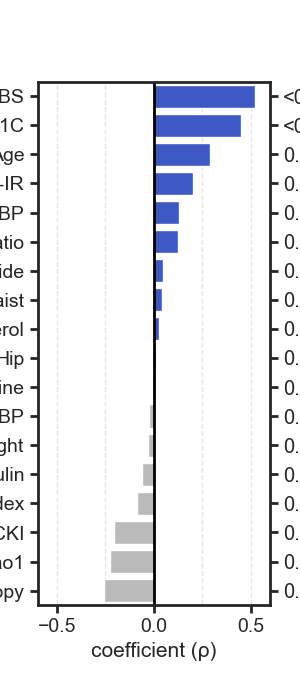

In [62]:
%matplotlib nbagg
sns.set_style("white")
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(3,6.8)

In [63]:
sns.set(font_scale=1.2)
colors = ['#274bdc' if x > 0 else '#bababa' for x in df1['coefficient']]

sns.barplot(data=df1, x=df1["coefficient"], y=df1["feature"], palette=colors, ax=ax, width=0.8)
ax.set_xlabel("coefficient (ρ)",size=15)
ax.set_ylabel("", size=15)
ax.set_title("",size=15)
plt.xticks(size=14)
plt.yticks(size=14)

ax = plt.gca()
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True,right=True, bottom=True, labelleft=True, labelbottom=True, width=2)

ax.axvline(x=-0.25, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=-0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0, c='Black', alpha=1, lw=2)
ax.axvline(x=0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0.25, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)

ax.set(xlim=(-0.6,0.6)) 

for i, row in df1.iterrows():
    ax.text(0.666, i, f"{row['p-value']}", va="center_baseline")
    
plt.savefig("metformin-corr-features.svg", bbox_inches='tight') 

In [65]:
df1=pd.read_csv('metformin-corr-taxa.csv')
df1

,feature,coefficient,p-value
0,Escherichia-Shigella,0.2072,0.065
1,Methanobrevibacter,0.1936,0.085
2,Megamonas,0.1718,0.127
3,f_Lachnospiraceae;g_uc,0.1470,0.193
4,Gastranaerophilales,0.1407,0.213
5,f_Ruminococcaceae;g_Incertae_Sedis,0.1367,0.227
6,Solobacterium,0.1350,0.232
7,f_Oscillospiraceae;g_UCG-002,0.1125,0.32
8,f_Anaerovoracaceae;g_Family_XIII_AD3011,0.1108,0.328
9,Akkermansia,0.0892,0.431


<IPython.core.display.Javascript object>


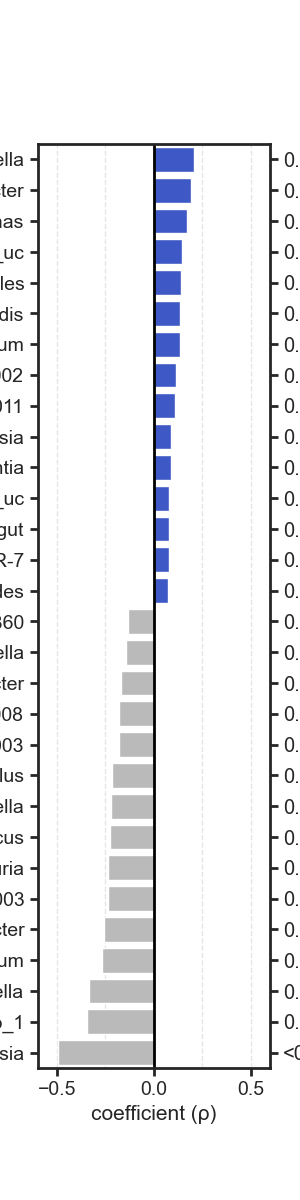

In [66]:
%matplotlib nbagg
sns.set_style("white")
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(3,12)

In [67]:
sns.set(font_scale=1.2)
colors = ['#274bdc' if x > 0 else '#bababa' for x in df1['coefficient']]

sns.barplot(data=df1, x=df1["coefficient"], y=df1["feature"], palette=colors, ax=ax, width=0.8)
ax.set_xlabel("coefficient (ρ)",size=15)
ax.set_ylabel("", size=15)
ax.set_title("",size=15)
plt.xticks(size=14)
plt.yticks(size=14)

ax = plt.gca()
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True,right=True, bottom=True, labelleft=True, labelbottom=True, width=2)

ax.axvline(x=-0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=-0.25, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0, c='Black', alpha=1, lw=2)
ax.axvline(x=0.25, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)

ax.set(xlim=(-0.6,0.6)) 

for i, row in df1.iterrows():
    ax.text(0.666, i, f"{row['p-value']}", va="center_baseline")
    
plt.savefig("metformin-corr-taxa.svg", bbox_inches='tight') 

## A1C corr

In [3]:
cd C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr\A1C-corr

C:\Users\Gwoncheol\Dropbox\[Microbiome_analysis]\[Qiime2]\QIIME2_Indian_Diebetes_study\Corr\A1C-corr


In [4]:
df1 = pd.read_csv('nor-dia-A1C-corr.csv')
df1.set_index('#OTU ID', inplace=True)
df1.head(1)

,HbA1C-classification,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;__,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;__;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium,d__Bacteria;__;__;__;__;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Dialister,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Catenibacterium,d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Agathobacter,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__UCG-004,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Oxalobacteraceae;g__Herbaspirillum,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rickettsiales;f__Mitochondria;g__Mitochondria,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Kocuria,d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Gemellaceae;g__Gemella,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Barnesiellaceae;g__Coprobacter,d__Bacteria;p__Bdellovibrionota;c__Bdellovibrionia;o__Bdellovibrionales;f__Bdellovibrionaceae;g__Bdellovibrio,d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Acidovorax,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__Saccharimonadaceae;g__TM7x
#OTU ID,,,,,,,,,,,,,,,,,,,,,
M_004,1.0,0.0,0.0,0.096197,0.338091,0.0,0.001173,0.000459,0.006678,0.248012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
spearman_df = df1.corr(method = 'spearman')
spearman_df.to_csv('nor-dia-A1C-corr.txt', sep= '\t')

In [14]:
def calculate_p_values(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    if np.sum(mask) < 3:  # Minimum number of non-NaN values required for Spearman correlation
        return np.nan
    else:
        return spearmanr(x[mask], y[mask])[1]
p_values = df1.apply(lambda x: df1.apply(lambda y: calculate_p_values(x, y)))
flat_p_values = np.array(p_values.values.flatten())
adjusted_p_values = multipletests(flat_p_values, method='fdr_bh')[1]
adjusted_p_values = pd.DataFrame(adjusted_p_values.reshape(p_values.shape), index=df1.columns, columns=df1.columns)
p_values.to_csv('nor-dia-A1C-corr-p-value.txt', sep= '\t')

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

In [9]:
df1 = pd.read_csv('nor-pre-A1C-corr.csv')
df1.set_index('#OTU ID', inplace=True)
df1.head(1)

,HbA1C-classification,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;__,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;__;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium,d__Bacteria;__;__;__;__;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Dialister,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Catenibacterium,d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Agathobacter,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__UCG-004,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Oxalobacteraceae;g__Herbaspirillum,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rickettsiales;f__Mitochondria;g__Mitochondria,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Kocuria,d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Gemellaceae;g__Gemella,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Barnesiellaceae;g__Coprobacter,d__Bacteria;p__Bdellovibrionota;c__Bdellovibrionia;o__Bdellovibrionales;f__Bdellovibrionaceae;g__Bdellovibrio,d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Acidovorax,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__Saccharimonadaceae;g__TM7x
#OTU ID,,,,,,,,,,,,,,,,,,,,,
M_006,0,0.0,0.0,0.007631,0.2654,0.0,0.0,0.0,0.088228,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
spearman_df = df1.corr(method = 'spearman')
spearman_df.to_csv('nor-pre-A1C-corr.txt', sep= '\t')

In [16]:
def calculate_p_values(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    if np.sum(mask) < 3:  # Minimum number of non-NaN values required for Spearman correlation
        return np.nan
    else:
        return spearmanr(x[mask], y[mask])[1]
p_values = df1.apply(lambda x: df1.apply(lambda y: calculate_p_values(x, y)))
flat_p_values = np.array(p_values.values.flatten())
adjusted_p_values = multipletests(flat_p_values, method='fdr_bh')[1]
adjusted_p_values = pd.DataFrame(adjusted_p_values.reshape(p_values.shape), index=df1.columns, columns=df1.columns)
p_values.to_csv('nor-pre-A1C-corr-p-value.txt', sep= '\t')

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

In [12]:
df1 = pd.read_csv('pre-dia-A1C-corr.csv')
df1.set_index('#OTU ID', inplace=True)
df1.head(1)

,HbA1C-classification,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;__,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;__;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium,d__Bacteria;__;__;__;__;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Dialister,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Catenibacterium,d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Agathobacter,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__UCG-004,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Oxalobacteraceae;g__Herbaspirillum,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rickettsiales;f__Mitochondria;g__Mitochondria,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Kocuria,d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Gemellaceae;g__Gemella,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Barnesiellaceae;g__Coprobacter,d__Bacteria;p__Bdellovibrionota;c__Bdellovibrionia;o__Bdellovibrionales;f__Bdellovibrionaceae;g__Bdellovibrio,d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Acidovorax,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__Saccharimonadaceae;g__TM7x
#OTU ID,,,,,,,,,,,,,,,,,,,,,
M_004,1,0.0,0.0,0.096197,0.338091,0.0,0.001173,0.000459,0.006678,0.248012,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [13]:
spearman_df = df1.corr(method = 'spearman')
spearman_df.to_csv('pre-dia-A1C-corr.txt', sep= '\t')

In [17]:
def calculate_p_values(x, y):
    mask = ~np.isnan(x) & ~np.isnan(y)
    if np.sum(mask) < 3:  # Minimum number of non-NaN values required for Spearman correlation
        return np.nan
    else:
        return spearmanr(x[mask], y[mask])[1]
p_values = df1.apply(lambda x: df1.apply(lambda y: calculate_p_values(x, y)))
flat_p_values = np.array(p_values.values.flatten())
adjusted_p_values = multipletests(flat_p_values, method='fdr_bh')[1]
adjusted_p_values = pd.DataFrame(adjusted_p_values.reshape(p_values.shape), index=df1.columns, columns=df1.columns)
p_values.to_csv('pre-dia-A1C-corr-p-value.txt', sep= '\t')

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\Gwoncheol\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant

In [43]:
df1=pd.read_csv('Nor-Dia.csv')
df1

,Taxa,HbA1C-classification,p-value,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Fusicatenibacter,0.280168,0.021658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subdoligranulum,0.244391,0.046249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Klebsiella,0.189815,0.123930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lactobacillus,0.188041,0.127546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,o_Bacteroidales;_;_,0.168516,0.172827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Agathobacter,0.166339,0.178524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,[Eubacterium]_siraeum,0.163289,0.186732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,f_Lachnospiraceae;g_uc,0.157466,0.203154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Saccharimonadales,0.152630,0.217553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Collinsella,0.151531,0.220924,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


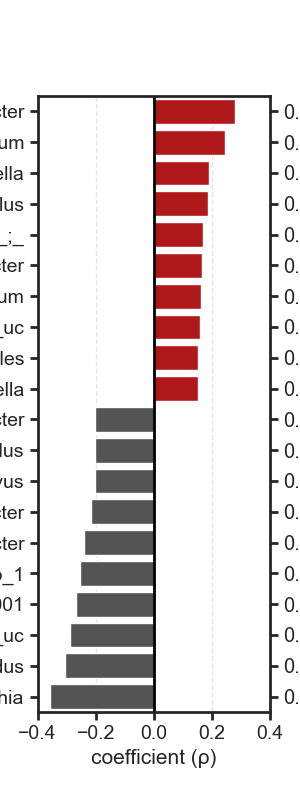

In [44]:
%matplotlib nbagg
sns.set_style("white")
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(3,8)

In [46]:
sns.set(font_scale=1.2)
colors = ['#c90000' if x > 0 else '#545454' for x in df1['HbA1C-classification']]

sns.barplot(data=df1, x=df1["HbA1C-classification"], y=df1["Taxa"], palette=colors, ax=ax, width=0.8)
ax.set_xlabel("coefficient (ρ)",size=15)
ax.set_ylabel("", size=15)
ax.set_title("",size=15)
plt.xticks(size=14)
plt.yticks(size=14)

ax = plt.gca()
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True,right=True, bottom=True, labelleft=True, labelbottom=True, width=2)

ax.axvline(x=-0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=-0.2, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0, c='Black', alpha=1, lw=2)
ax.axvline(x=0.2, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)

ax.set(xlim=(-0.4,0.4)) 
for i, row in df1.iterrows():
    text = "{:.3f}".format(row['p-value'])  # Format the number with one decimal place
    ax.text(0.444, i, text, va="center_baseline")
    
plt.savefig("Nor-Dia.svg", bbox_inches='tight') 

In [47]:
df1=pd.read_csv('Nor-Pre.csv')
df1

,Taxa,HbA1C-classification,p-value
0,Subdoligranulum,0.294512,0.046943
1,Fusicatenibacter,0.289266,0.051199
2,Klebsiella,0.247116,0.097785
3,Agathobacter,0.243231,0.103347
4,Acidaminococcus,0.211637,0.157968
5,Butyrivibrio,0.211637,0.157968
6,Lachnospiraceae_UCG-010,0.211637,0.157968
7,o_Bacteroidales;_;_,0.192035,0.201058
8,Erysipelotrichaceae_UCG-003,0.185968,0.215933
9,Haemophilus,0.174389,0.246406


<IPython.core.display.Javascript object>


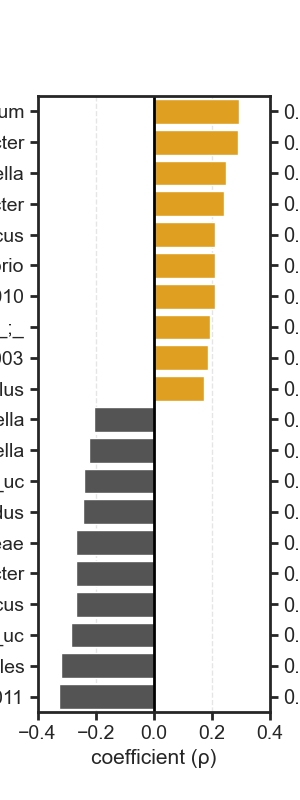

In [48]:
%matplotlib nbagg
sns.set_style("white")
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(3,8)

In [49]:
sns.set(font_scale=1.2)
colors = ['#ffaa00' if x > 0 else '#545454' for x in df1['HbA1C-classification']]

sns.barplot(data=df1, x=df1["HbA1C-classification"], y=df1["Taxa"], palette=colors, ax=ax, width=0.8)
ax.set_xlabel("coefficient (ρ)",size=15)
ax.set_ylabel("", size=15)
ax.set_title("",size=15)
plt.xticks(size=14)
plt.yticks(size=14)

ax = plt.gca()
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True,right=True, bottom=True, labelleft=True, labelbottom=True, width=2)

ax.axvline(x=-0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=-0.2, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0, c='Black', alpha=1, lw=2)
ax.axvline(x=0.2, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)

ax.set(xlim=(-0.4,0.4)) 
for i, row in df1.iterrows():
    text = "{:.3f}".format(row['p-value'])  # Format the number with one decimal place
    ax.text(0.444, i, text, va="center_baseline")
    
plt.savefig("Nor-Pre.svg", bbox_inches='tight') 

In [50]:
df1=pd.read_csv('Pre-Dia.csv')
df1

,Taxa,HbA1C-classification,p-value
0,f_Ruminococcaceae;g_Incertae_Sedis,0.255223,0.025079
1,f_Anaerovoracaceae;g_Family_XIII_AD3011,0.233617,0.040871
2,Lactobacillus,0.228374,0.045752
3,o_Bacteroidales;f_uc;g_uc,0.210006,0.066780
4,Collinsella,0.195634,0.088171
5,Sarcina,0.176871,0.123851
6,Mogibacterium,0.174317,0.129458
7,Gastranaerophilales,0.162756,0.157284
8,Catenisphaera,0.152227,0.186283
9,Victivallis,0.152168,0.186455


<IPython.core.display.Javascript object>


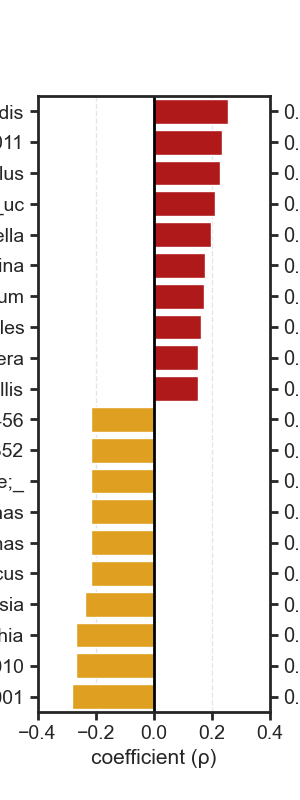

In [55]:
%matplotlib nbagg
sns.set_style("white")
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(3,8)

In [56]:
sns.set(font_scale=1.2)
colors = ['#c90000' if x > 0 else '#ffaa00' for x in df1['HbA1C-classification']]

sns.barplot(data=df1, x=df1["HbA1C-classification"], y=df1["Taxa"], palette=colors, ax=ax, width=0.8)
ax.set_xlabel("coefficient (ρ)",size=15)
ax.set_ylabel("", size=15)
ax.set_title("",size=15)
plt.xticks(size=14)
plt.yticks(size=14)

ax = plt.gca()
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.tick_params(left=True,right=True, bottom=True, labelleft=True, labelbottom=True, width=2)

ax.axvline(x=-0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=-0.2, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0, c='Black', alpha=1, lw=2)
ax.axvline(x=0.2, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)
ax.axvline(x=0.5, c='grey', alpha=0.2, lw=1,linestyle='dashed', zorder=0)

ax.set(xlim=(-0.4,0.4)) 
for i, row in df1.iterrows():
    text = "{:.3f}".format(row['p-value'])  # Format the number with one decimal place
    ax.text(0.444, i, text, va="center_baseline")
    
plt.savefig("Pre-Dia.svg", bbox_inches='tight') 